# **Machine Learning Project 1**
### Unsupervised Learning - Clustering


---


Diksha Jain, 045018

## **INTRODUCTION**

### 1. OBJECTIVE:
I will explore how to segment or cluster online retail customers from an e-commerce store through this analysis.
Understanding customer behavior and organizing your customer base is crucial in today's dynamic business landscape. This empowers your marketing and strategy teams to make informed decisions and gain a competitive advantage.
Many companies are increasingly turning to Customer Relationship Management (CRM) software to enhance customer relationships. (CRM is a technology used to manage customer interactions and improve business performance.) Customer segmentation plays a vital role within CRM by allowing you to group and categorize your customers for better understanding.
Therefore, the main objective of this analysis is to develop a model that can effectively group customers and generate valuable insights for actionable business strategies.

### 2. DATA SET

This table provides a summary of the data used in the analysis:

* Invoice Number (InvoiceNo): A unique six-digit code assigned to each.
transaction. Transactions starting with "C" indicate cancellations. (Nominal)

* Product Code (StockCode): A unique five-digit code assigned to each distinct product. (Nominal)

* Product Name (Description): The name of the product. (Nominal)
Quantity: The number of units of each product purchased in a single transaction. (Numeric)

* Purchase Date (InvoiceDate): The date and time of a transaction. (Numeric)
Unit Price: The price per unit of each product. (Numeric)

* Customer ID (CustomerID): A unique five-digit code assigned to each customer. (Nominal)

* Customer Country (Country): The country where the customer resides. (Nominal)

### 3. CUSTOMER SEGMENTATION

In today's competitive landscape, understanding your customers is no longer enough. Businesses need to decipher the unique needs and behaviors within their customer base to truly thrive. This is where customer segmentation comes in.

Imagine a diverse crowd – a microcosm of your customer base. Segmentation allows you to sort this crowd into smaller, more focused groups based on shared characteristics. These groups, or segments, can be defined by demographics (age, income, location), purchase history (frequency, product preferences), or even online behavior (website browsing patterns, social media engagement).

The beauty of segmentation lies in its ability to unlock hidden customer potential. By understanding the specific needs and preferences within each segment, businesses can:

* Craft targeted marketing campaigns: Instead of a generic shotgun approach, you can tailor messaging and offers that resonate with each segment's unique interests and pain points.
* Personalize the customer journey: From product recommendations to customer service interactions, every touchpoint can be tailored to provide a seamless and relevant experience for each segment.
* Predict and anticipate customer behavior: By analyzing past behavior within each segment, businesses can anticipate customer needs and pro-actively address them, fostering loyalty and satisfaction.
* Drive innovation and product development: Insights from segmentation can reveal unmet needs or emerging trends, guiding the creation of products and services that directly address the desires of specific customer segments.

Ultimately, customer segmentation empowers businesses to move beyond the one-size-fits-all approach and create meaningful connections with their customers. It's a strategic lens that allows you to see your customers not as a homogenous mass, but as individuals with unique needs and preferences, waiting to be understood and catered to.

# **ANALYSIS**

### 1. Data Preparation

* Importing libraries: We'll start by importing the necessary libraries for data manipulation, analysis, and visualization.
* Loading data: The required dataset will be loaded and explored to understand its structure and content.
* Data Cleaning: Any missing values, inconsistencies, or errors in the data will be addressed through appropriate cleaning techniques.

### 2. Exploratory Data Analysis (EDA)

* Data overview: We'll gain a high-level understanding of the data by summarizing key statistics and identifying potential patterns.
* Visualization: We'll use various plots and charts to visualize the distribution of customer characteristics, purchase behavior, and potential relationships between variables. This will help us identify trends, outliers, and areas of further exploration.

### 3. Customer Segmentation

* K-means clustering: This technique will be employed to group customers based on their similarities in purchase behavior. The optimal number of clusters will be determined using techniques like the elbow method.
* RFM analysis: We'll perform RFM analysis to assign scores to each customer based on their Recency (how recently they purchased), Frequency (how often they purchase), and Monetary Value (how much they spend). This will provide insights into customer lifetime value and potential churn risk.
* Heirarchial Clustering:

### 4. Insights and Actions

* Combined analysis: We'll combine the results of k-means clustering and RFM analysis to gain a comprehensive understanding of each customer segment.
* Customer insights: We'll interpret the findings to identify valuable customer segments, their characteristics, and potential behavior patterns.
* Actionable recommendations: Based on the insights, we'll formulate actionable recommendations for targeted marketing strategies, personalized customer experiences, and improved customer retention strategies.

### 5. Conclusion

* Summary: We'll summarize the key findings of the analysis and their implications for customer segmentation and marketing strategies.

# **DATA PREPARATION**

## Importing libraries:

We'll begin our analysis by importing the necessary packages that will equip us to effectively handle the data. These packages will be particularly useful in the Exploratory Data Analysis (EDA) section, as it allows for the creation of interactive and visually appealing charts.

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00


In [ ]:
# Import libraries
import os
import math
import datetime
import numpy as np
import plotly as py
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as seaborn
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['figure.figsize'] = [10,6]
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

## Data Understanding:

Loading the dataset provided from kaggle and getting a View of the data.

In [ ]:
# Reading excel file
df = pd.read_excel('/content/MLM_P1.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Looking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Unique Data:

Our dataset consists of 4.373 unique CustomerID values and 4.212 unique products based on distinct Descriptions


In [ ]:
# Checking the values for 'Quantity'
for i in df['Quantity'].unique():
  print(i)

6
8
2
32
3
4
24
12
48
18
20
36
80
64
10
120
96
23
5
1
-1
50
40
100
192
432
144
288
-12
-24
16
9
128
25
30
28
7
56
72
200
600
480
-6
14
-2
11
33
13
-4
-5
-7
-3
70
252
60
216
384
-10
27
15
22
19
17
21
34
47
108
52
-9360
-38
75
270
42
240
90
320
1824
204
69
-36
-192
-144
160
2880
1400
39
-48
-50
26
1440
31
82
78
97
98
35
57
-20
110
-22
-30
-70
-130
-80
-120
-40
-25
-14
-15
-69
-140
-320
-8
720
156
324
38
37
49
95
-9
-11
29
41
-72
-35
-21
-43
-19
-18
-44
402
378
150
300
54
104
67
258
66
44
55
46
99
61
408
972
208
1008
1000
-77
1488
250
1394
400
-223
-150
-13
-33
-723
-177
79
84
-32
-100
-28
272
-145
-47
-96
113
45
106
68
267
115
65
1728
-60
-16
53
-240
76
460
71
43
213
58
576
2400
500
180
-300
-500
-23
752
960
1296
210
172
215
129
138
116
135
197
-106
-54
-17
-939
147
168
256
-201
-53
-29
-2600
-990
-290
-45
860
1010
1356
1284
186
114
360
1930
2000
3114
1300
670
111
211
59
-310
-61
-41
176
648
62
74215
-74215
-64
-84
89
-1400
73
-57
112
456
-59
-31
5568
2560
136
900
-600
-42
-94
-207
-52
1

In [ ]:
# Checking the values for 'Unit Price'
for i in df['UnitPrice'].unique():
  print(i)

2.55
3.39
2.75
7.65
4.25
1.85
1.69
2.1
3.75
1.65
4.95
9.95
5.95
7.95
0.85
0.65
1.25
2.95
1.95
0.42
18.0
1.06
6.95
10.95
3.45
0.55
0.38
1.45
3.95
6.75
27.5
14.95
16.95
4.65
6.45
12.75
19.95
8.5
3.82
3.37
5.45
6.35
0.72
0.64
0.1
0.32
1.48
0.29
165.0
35.75
3.35
10.65
15.0
0.95
0.21
0.12
0.0
0.24
3.25
1.49
2.25
1.55
18.95
8.95
50.0
2.51
1.66
0.43
7.62
4.21
2.98
5.91
3.36
16.98
1.28
11.02
8.47
0.81
5.06
12.72
10.17
6.77
20.38
11.87
25.49
51.02
9.32
34.0
0.84
16.13
21.23
18.68
14.43
3.81
4.24
1.26
5.09
2.96
2.11
569.77
13.57
29.95
4.6
1.05
5.49
59.53
15.28
19.53
2.82
1.27
3.19
0.99
2.13
5.51
8.49
8.07
7.22
2.54
9.34
5.94
607.49
0.19
10.75
24.95
79.95
11.95
0.03
0.75
0.36
0.34
0.16
1.88
7.25
0.18
295.0
40.0
5.74
29.79
254.43
121.06
498.47
1.84
6.37
887.52
3.83
28.0
7.5
42.95
21.95
26.95
29.29
0.14
5.55
49.95
1.0
3.49
76.55
10.62
7.64
863.74
39.96
11.05
940.87
15.95
35.0
4.41
0.3
9.77
0.83
950.99
6.6
1.93
3.21
0.53
924.59
95.38
12.95
52.0
281.0
631.31
313.78
0.07
13541.33
1.7
836.14
229.74
448

## Data Cleaning



In [ ]:
# Function to remove negative values
def fix_negative(x):
  if x[0]=="-":
    return float(x[1:])
  else:
    return float(x)

In [ ]:
# Eliminating the negative values on Quantity
df['Quantity'] = df['Quantity'].astype(str)
df['Quantity'] = df['Quantity'].apply(fix_negative)

Checking & Dealing with missing values

In [ ]:
# Checking the null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Eliminating the null values
df=df.dropna()
# Rechecking the null values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Checking & Treating Outliers:
From the above analysis, we found that there are outliers on 'Quantity' & 'Unit Price'

<Axes: ylabel='Quantity'>

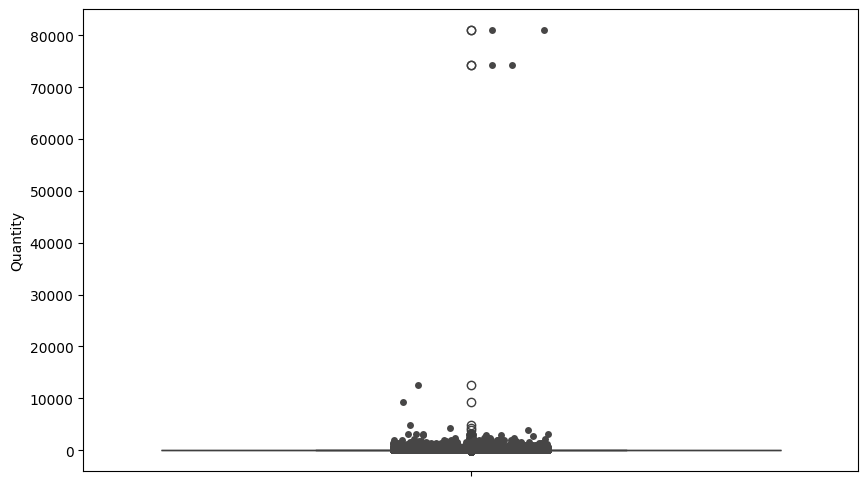

In [ ]:
# Identifying and dealing with outliers
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='Quantity'>

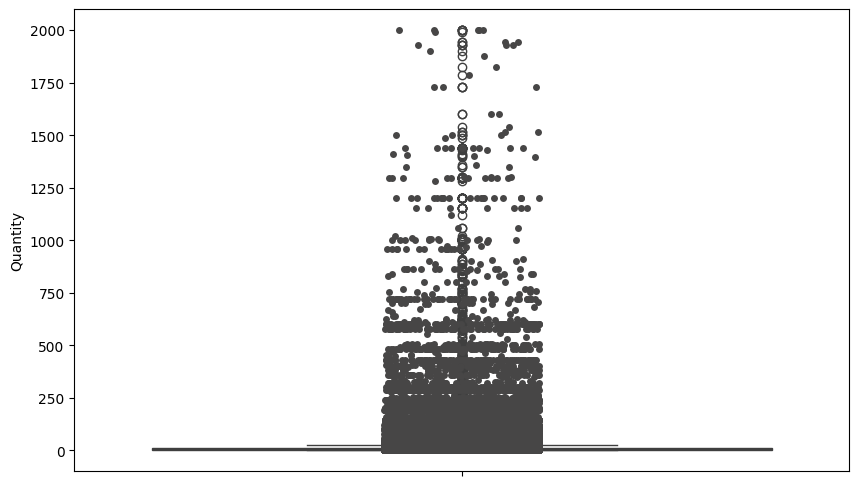

In [ ]:
# Eliminating the outliers
outliers_indices = df.loc[df['Quantity']>2000].index
df = df.drop(outliers_indices)
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

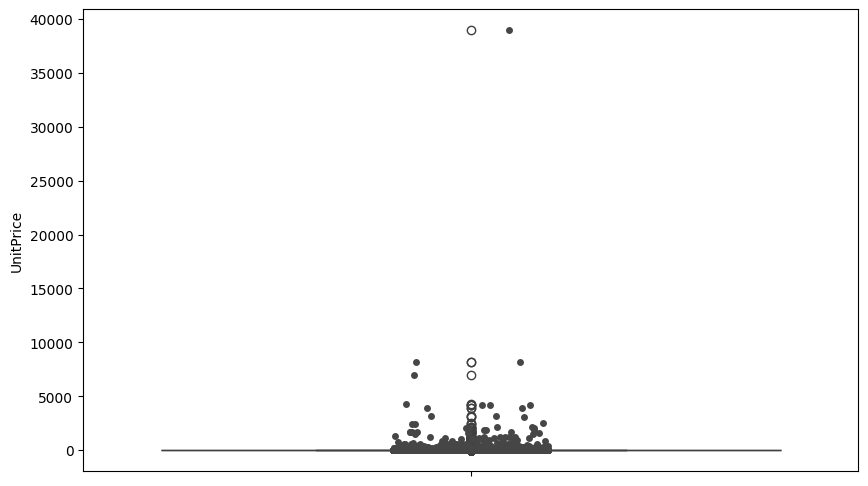

In [ ]:
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

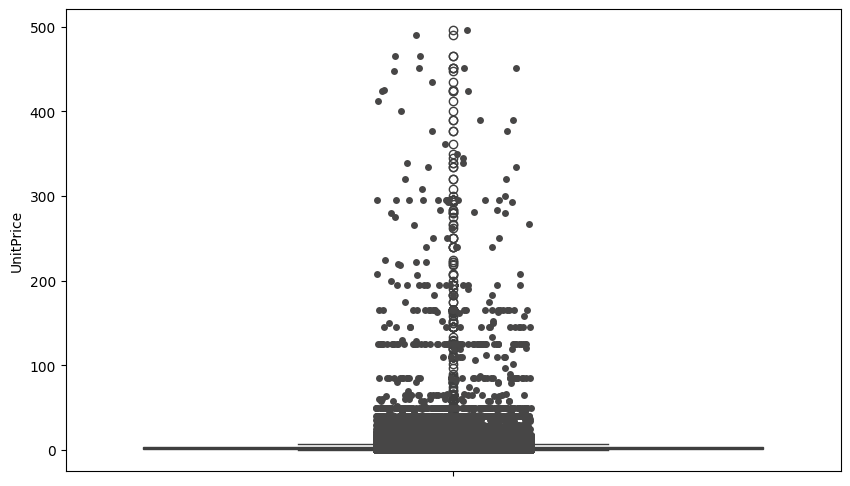

In [ ]:
outliers_indices = df.loc[df['UnitPrice']>500].index
df= df.drop(outliers_indices)
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

## Feature Engineering:

If needed, new features might be created from existing data to enhance the analysis.

In [ ]:
# Mutating df DataFrame to add 'Spent' column
df['Spent'] = df['Quantity'] * df['UnitPrice']

# Creating a new customer DataFrame
customer = df.groupby(['CustomerID', 'Country']).agg({'Spent': 'sum', 'Quantity': 'sum'}).reset_index()

# Extracting new date and time columns from 'InvoiceDate' column
df['InvoiceDate'] = df['InvoiceDate'].astype(str)
df['date'] = df['InvoiceDate'].str.split(' ').str[0]
df['time'] = df['InvoiceDate'].str.split(' ').str[1]

# Extracting new month, year, and hour columns
df['year'] = df['date'].str.split('-').str[0]
df['month'] = df['date'].str.split('-').str[1]
df['hour'] = df['time'].str.split(':').str[0]

# Converting 'date' feature to date type
df['date'] = pd.to_datetime(df['date'])

# Creating day of the week feature
df['day_week'] = df['date'].dt.day_name()

# Creating a frame with unique descriptions for further exploration of products offered
products_list = df['Description'].unique()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,date,time,year,month,hour,day_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010,12,08,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,08,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010,12,08,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,08,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,08,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12:50:00,2011,12,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00,2011,12,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00,2011,12,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00,2011,12,12,Friday


# **Exploratory Data Analysis**

The following section delves into Exploratory Data Analysis (EDA), a crucial step in understanding the inner workings of the dataset. Through EDA, we embark on an initial investigation to:

* Unearth common patterns: By analyzing the data distribution and relationships between variables, we can identify recurring trends and patterns within the customer base.
* Pinpoint anomalies: EDA allows us to detect outliers and potential inconsistencies in the data, prompting further exploration and potential data cleaning procedures.
* Extract valuable information: Visualizations crafted during EDA provide a clear and concise picture of the data, revealing hidden insights that might be missed in raw numerical form.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406718.000000,406718.000000,406718.000000
mean,12.462079,3.027157,15287.933067
std,38.561896,6.033656,1713.540733
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,2000.000000,495.980000,18287.000000


a. Getting a visual of the Countries with the most transactions - total invoices.

In [ ]:
plot_clean1 = df.groupby('Country').size().reset_index(name='n')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=plot_clean1['Country'],
    y=plot_clean1['n'],
    name='Total Invoices'
))

fig.update_layout(
    title="Total Invoices - Transaction per Country",
    xaxis_title="Country",
    yaxis_title="Total Invoices",
    barmode='group',
    paper_bgcolor='rgba(255, 255, 255, 0.7)',
    plot_bgcolor='rgba(200, 200, 255, 0.7)',
    margin=dict(l=50, r=50, t=50, b=50),
    showlegend=True
)

fig.show()

We can see that the orders of the store come mainly from the UK.

b. The total revenue chart by date from the total amount spent by customers

In [ ]:
# Grouping by date and calculating revenue
revenue_date1 = df.groupby('date').agg(revenue=('Spent', 'sum')).reset_index()

# Creating a time series plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=revenue_date1['date'],
    y=revenue_date1['revenue'],
    mode='lines',
    name='Revenue'
))

fig.update_layout(
    title="Revenue by Date",
    xaxis_title="Date",
    yaxis_title="Revenue",
    paper_bgcolor='rgba(255, 255, 255, 0.7)',
    plot_bgcolor='rgba(200, 200, 255, 0.7)',
)

fig.show()

The revenue chart for the retail store in 2021 reveals a consistent upward trend, culminating in a peak on September 20th.

c. Revenue by the different day of the week

In [ ]:
# Grouping by day of the week and calculating revenue
revenue_by_day = df.groupby('day_week').agg(revenue=('Spent', 'sum')).reset_index()

# Creating a column chart
fig = go.Figure(go.Bar(
    x=revenue_by_day['day_week'],
    y=revenue_by_day['revenue'],
))

fig.update_layout(
    title="Revenue by Day of Week",
    xaxis_title="Day of the Week",
    yaxis_title="Revenue",
    paper_bgcolor='rgba(255, 255, 255, 0.7)',
    plot_bgcolor='rgba(200, 200, 255, 0.7)',
)

fig.show()

The graph suggests a
noticeable decrease in purchases on Sundays compared to other days of the week.

d. Revenue and transactions by Hour of the Day

In [ ]:
# Grouping by hour of the day and calculating revenue
revenue_by_hour = df.groupby('hour').agg(revenue=('Spent', 'sum')).reset_index()

# Creating a column chart
fig = go.Figure(go.Bar(
    x=revenue_by_hour['hour'],
    y=revenue_by_hour['revenue'],
))

fig.update_layout(
    title="Revenue by Hour Of Day",
    xaxis_title="Hour Of Day",
    yaxis_title="Revenue",
    paper_bgcolor='rgba(255, 255, 255, 0.7)',
    plot_bgcolor='rgba(200, 200, 255, 0.7)',
)

fig.show()

In [ ]:
# Grouping by hour of the day and calculating the number of transactions
transactions_by_hour = df.groupby('hour').agg(transactions=('InvoiceNo', 'nunique')).reset_index()

# Creating a column chart
fig = go.Figure(go.Bar(
    x=transactions_by_hour['hour'],
    y=transactions_by_hour['transactions'],
))

fig.update_layout(
    title="Transactions by Hour Of Day",
    xaxis_title="Hour Of Day",
    yaxis_title="Number of Transactions",
    paper_bgcolor='rgba(255, 255, 255, 0.7)',
    plot_bgcolor='rgba(200, 200, 255, 0.7)',
)

fig.show()

* Both transactions and revenue peak at noon.
* Mid-day is the most active period for the store.

# **DATA PREPROCESSING**

## Segmentation - Clustering

### RFM: Recency, Frequency, Monetary Value:

In [ ]:
# Make the columns 'RFM' (Recency, Frequency, Monetary)
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Keeping the columns in dataframe 'cus_data'
cus_data = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})
cus_data.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'Monetary'}, inplace=True)

In [ ]:
# Checking the dataframe
cus_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,95,3466.67


from matplotlib import pyplot as plt
_df_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Info data RFM customer
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4369 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4369 non-null   int64  
 1   Frequency  4369 non-null   int64  
 2   Monetary   4369 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.5 KB


## K-means Clustering
### Scaling the data

In [ ]:
# Performing the data normalization using MinMaxScaler
scaler = MinMaxScaler()
customers_norm = scaler.fit_transform(cus_data)

# Checking the normalization
customers_norm

array([[0.00536193, 0.02267602, 0.01561539],
       [0.20107239, 0.00375846, 0.00650887],
       [0.04825737, 0.0090203 , 0.00636503],
       ...,
       [0.01876676, 0.00150338, 0.000646  ],
       [0.0080429 , 0.09458782, 0.00758755],
       [0.11260054, 0.00864445, 0.00665398]])

In [ ]:
# Formatting the dataframe into the normalized data
customers_df = pd.DataFrame(customers_norm, columns=cus_data.columns)
# Checking the results
customers_df

,Recency,Frequency,Monetary
0,0.005362,0.022676,0.015615
1,0.201072,0.003758,0.006509
2,0.048257,0.009020,0.006365
3,0.831099,0.002005,0.001207
4,0.096515,0.011776,0.012559
...,...,...,...
4364,0.742627,0.001128,0.000650
4365,0.482574,0.000752,0.000288
4366,0.018767,0.001503,0.000646
4367,0.008043,0.094588,0.007588


from matplotlib import pyplot as plt
customers_df['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers_df['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers_df['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers_df.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers_df.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers_df['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
customers_df['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
customers_df['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
customers_df.describe()

,Recency,Frequency,Monetary
count,4369.000000,4369.000000,4369.000000
mean,0.245556,0.011540,0.007445
std,0.270034,0.029133,0.031988
min,0.000000,0.000000,0.000000
25%,0.042895,0.002005,0.001113
50%,0.134048,0.005137,0.002449
75%,0.383378,0.012653,0.006106
max,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_16['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

## Determining the Optimal Number of Clusters
Prior to applying the k-means clustering algorithm, it's crucial to identify the optimal number of clusters (k) for our dataset of wholesale customers. Common approaches to achieve this include:

### Elbow Method:
This technique visually analyzes the Within-Cluster Sum of Squares (WCSS) for different k values. The optimal k is typically identified at the "elbow" of the curve, where the WCSS decrease plateaus.

By employing these methods, we can determine the most suitable number of clusters to effectively segment our customer base.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

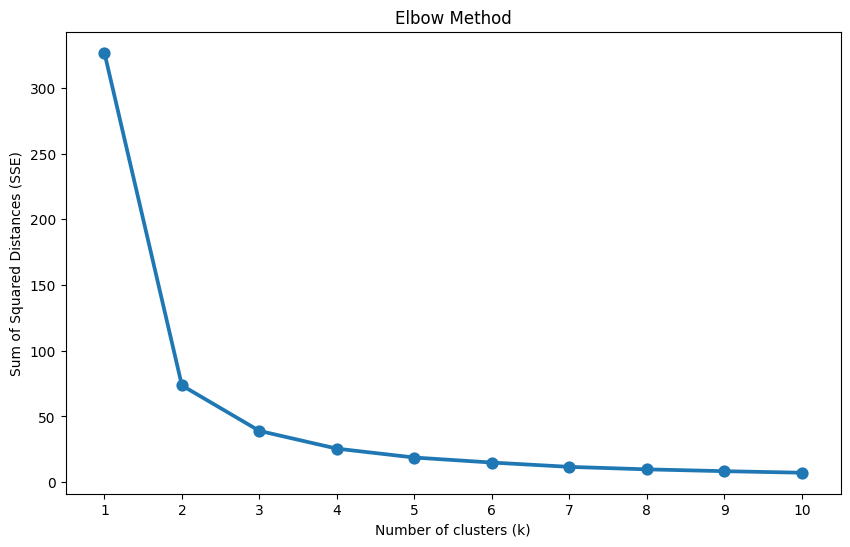

In [ ]:
# Finding k best using elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(customers_df)
    sse[k] = kmeans.inertia_ # SSE

# Elbow plot
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

 From the above analysis, the k value is 3

### Silhouette Method:
This method evaluates the silhouette coefficient for each data point. The silhouette coefficient measures how well a data point is assigned to its cluster compared to neighboring clusters. A higher average silhouette coefficient indicates a better clustering solution.

In [ ]:
# Finding the best method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=7)
kmedoids = KMedoids(n_clusters=3)
models = [kmeans, kmedoids]
name = ["K-Means Clustering", "K-Medoids Clustering", "Accelerated K-Means"]
for i in range(2):
    models[i].fit(customers_df)
    score = silhouette_score(customers_df, models[i].labels_, metric='euclidean')
    print(name[i], " Silhouette Score = ", score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering  Silhouette Score =  0.6554922184962163
K-Medoids Clustering  Silhouette Score =  0.5727668649042804


By comparing Silhouette Scores above, k means is selected to carry out the customer segmentation.

In [ ]:
# Fit model kmeans cluster
kmeans.fit(customers_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=7)

In [ ]:
# Adding 'cluster' column
cus_data['cluster'] = kmeans.labels_

# Displaying mean of each cluster
cus_data.groupby('cluster').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
cluster                                 
0         31.70    122.74  2729.70  2924
1        295.86     23.43   488.46   633
2        153.41     40.76   849.53   812

# **Visualizing (KMeans)**

In [ ]:
# Count of customers of each cluster
cus_data.cluster.value_counts()

0    2924
2     812
1     633
Name: cluster, dtype: int64

In [ ]:
fig = px.pie(df, values = cus_data['cluster'].value_counts(),
             names = (cus_data['cluster'].value_counts()).index,
             title = 'Predicted Clusters Distribution')
fig.show()

In [ ]:
# Predicting the results
y_kmeans=kmeans.fit_predict(customers_df)
# Converting dataframes into numpy arrays after importing
customers_np = customers_df.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



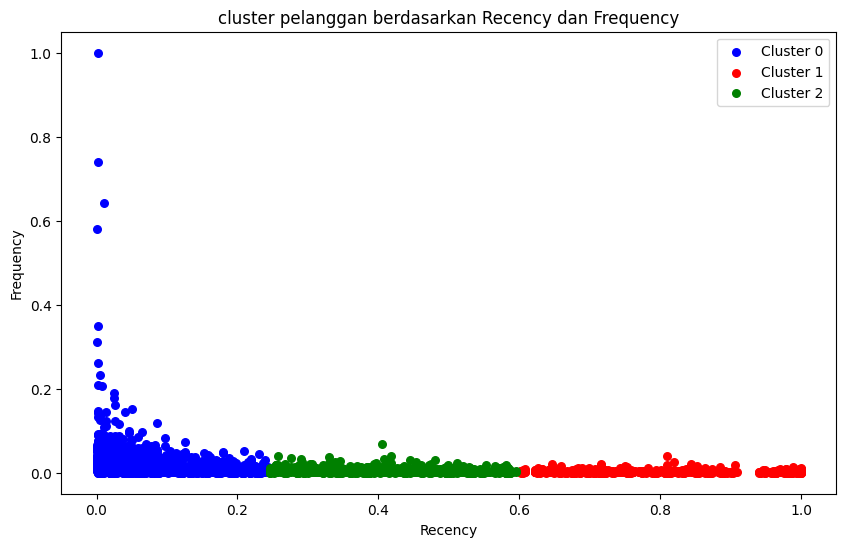

In [ ]:
# Visualizing all clusters

plt.scatter(customers_np[y_kmeans == 0, 0], customers_np[y_kmeans == 0, 1], s = 30, c = 'blue', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 0], customers_np[y_kmeans == 1, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 0], customers_np[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.title('cluster pelanggan berdasarkan Recency dan Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

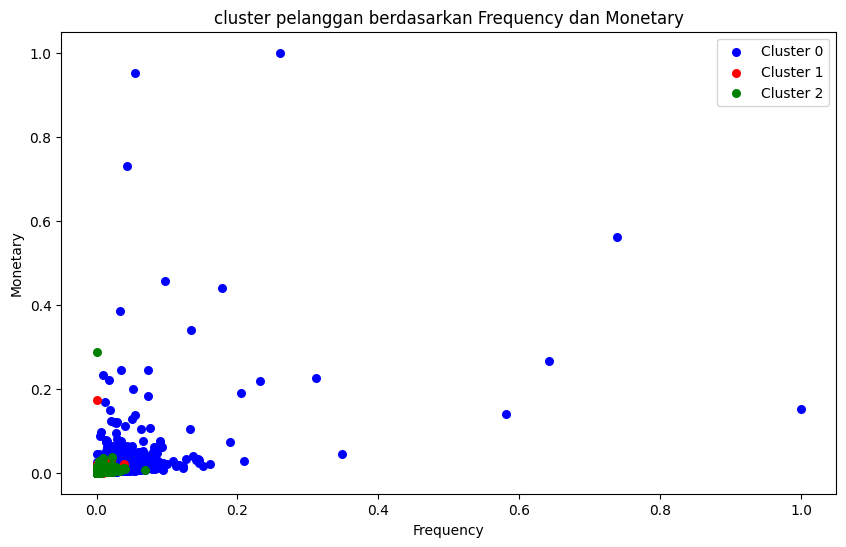

In [ ]:
plt.scatter(customers_np[y_kmeans == 0, 1], customers_np[y_kmeans == 0, 2], s = 30, c = 'blue', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 1], customers_np[y_kmeans == 1, 2], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 1], customers_np[y_kmeans == 2, 2], s = 30, c = 'green', label = 'Cluster 2')
plt.title('cluster pelanggan berdasarkan Frequency dan Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()


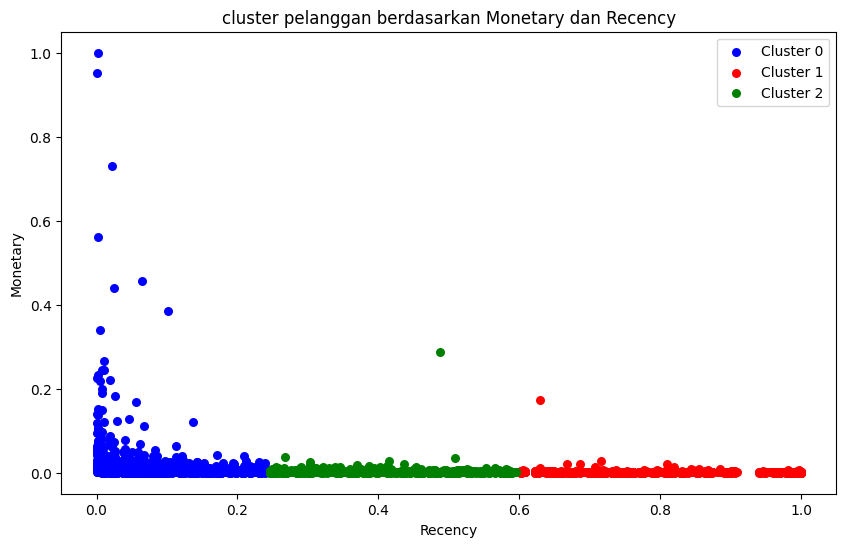

In [ ]:
plt.scatter(customers_np[y_kmeans == 0, 0], customers_np[y_kmeans == 0, 2], s = 30, c = 'blue', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 0], customers_np[y_kmeans == 1, 2], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 0], customers_np[y_kmeans == 2, 2], s = 30, c = 'green', label = 'Cluster 2')
plt.title('cluster pelanggan berdasarkan Monetary dan Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

In [ ]:
plot3d_1 = go.Scatter3d(
    x= customers_df['Recency'],
    y= customers_df['Frequency'],
    z= customers_df['Monetary'],

    mode = 'markers'
)

data = [plot3d_1]
layout = go.Layout(

#     )
    title= '3D Data',
    scene = dict(
            xaxis = dict(title  = 'Recency'),
            yaxis = dict(title  = 'Frequency'),
            zaxis = dict(title  = 'Monetary')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Heirarchial Clustering

In [ ]:
# Adding new column 'Total Price = Quantity * Unit Price'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


new_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})


new_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4369 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  4369 non-null   int64  
 1   InvoiceNo    4369 non-null   int64  
 2   TotalPrice   4369 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.5 KB


In [ ]:
new_df.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,95,3466.67


In [ ]:
scaler = MinMaxScaler()
normalize_df = scaler.fit_transform(new_df)

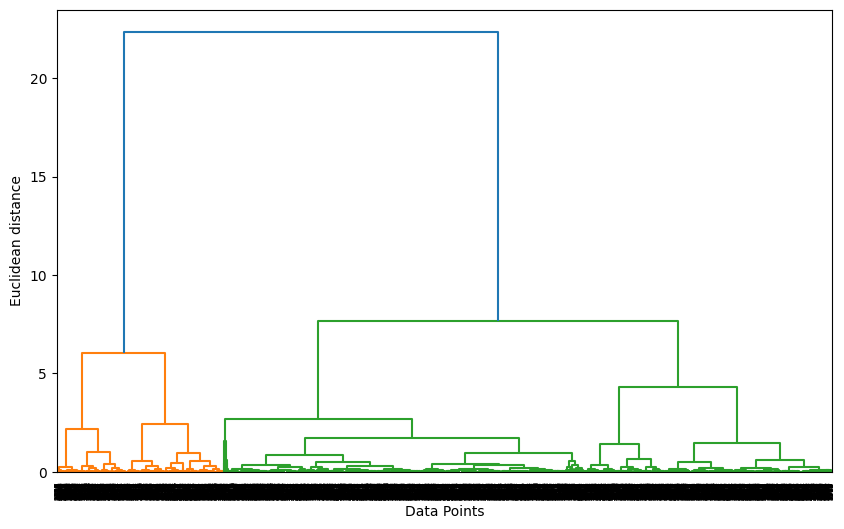

In [ ]:
merging = linkage(normalize_df, method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_hc = hc.fit_predict(normalize_df)

In [ ]:
with_hc_df = pd.DataFrame(normalize_df, columns=new_df.columns, index=new_df.index)
with_hc_df['cluster'] = cluster_hc
with_hc_df.head()

,InvoiceDate,InvoiceNo,TotalPrice,cluster
CustomerID,,,,
12347.0,0.005362,0.022676,0.015615,2
12348.0,0.201072,0.003758,0.006509,1
12349.0,0.048257,0.009020,0.006365,2
12350.0,0.831099,0.002005,0.001207,0
12352.0,0.096515,0.011776,0.012559,2


In [ ]:
with_hc_df['cluster'].value_counts(ascending=True)

0     943
1    1388
2    2038
Name: cluster, dtype: int64

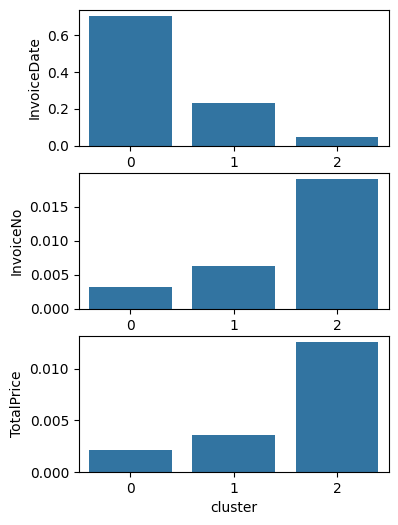

In [ ]:
cluster_mean = with_hc_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'TotalPrice']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='TotalPrice', ax=axes[2])

plt.show()

This analysis delved into online retail data, aiming to identify key factors for the business and segment the customer base for enhanced customer relationship management (CRM).

# **Key Findings:**

Customer Segmentation: We successfully identified three distinct customer clusters using the k-means approach. Notably, one cluster comprised the 25 most valuable customers (MVPs) for the business.
RFM Analysis: Building upon the segmentation, we employed RFM analysis to further categorize customers into specific groups, guiding targeted actions. The interactive table provides indicative insights for informing CRM practices.

# Additional Considerations:

The analysis highlights the potential for further customer segmentation granularity using additional data points, such as:

* Demographics: Age, race, religion, gender, family size, ethnicity, income, education level.
* Psychographics: Social class, lifestyle, and personality characteristics.
* Geography: More specific location data.
Limitations and Considerations:

* K-means Clustering: While offering efficiency and scalability, k-means clustering requires predefining the number of clusters and can be sensitive to outliers, potentially leading to varying results with data reordering.

* RFM Analysis: Similar considerations apply to RFM analysis.

* Company-Specific Approach: Ultimately, the chosen customer segmentation approach should align with the company's philosophy, culture, product/service type, and desired customer categorization for effective relationship building and future profitability.

# **Conclusion:**

The analysis underscores that clustering models, while valuable, should be treated as one component within the broader decision-making process. Combining insights from various sources and aligning with business objectives is crucial for making informed decisions and fostering strong customer relationships.